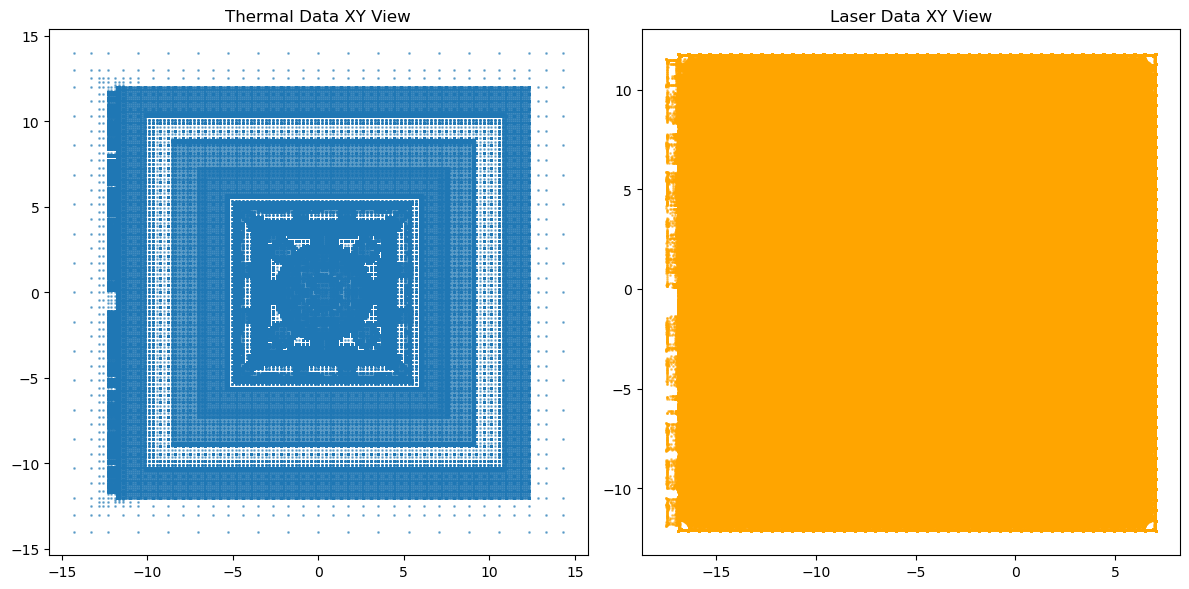

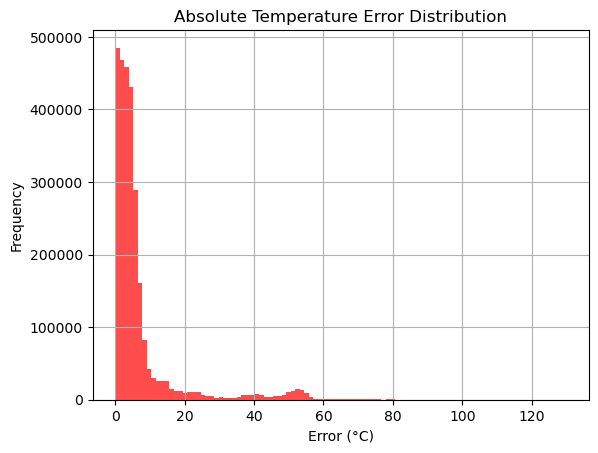

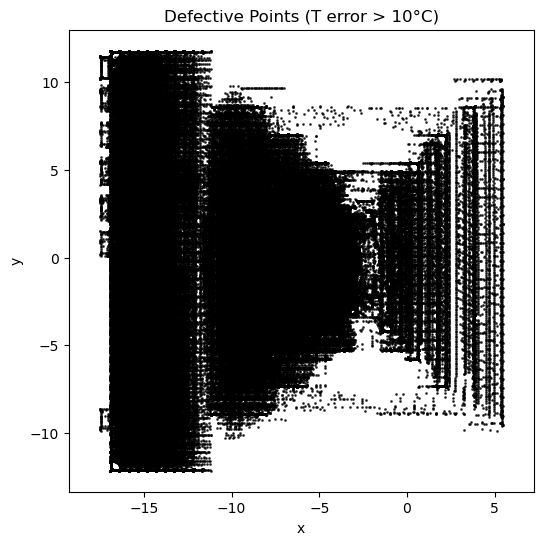

Mean Absolute Error (MAE): 6.94 °C
Maximum Error: 129.81 °C
Number of defective points: 362911


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

thermal_df = pd.read_csv("thermal1_scaled.csv")
laser_df = pd.read_csv("laser1.csv")
laser_thermal2_df = pd.read_csv("laser1_with_thermal2.csv")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(thermal_df['x'], thermal_df['y'], s=1, alpha=0.5, label='Thermal')
plt.title('Thermal Data XY View')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(laser_df['x'], laser_df['y'], s=1, alpha=0.5, color='orange', label='Laser')
plt.title('Laser Data XY View')
plt.axis('equal')
plt.tight_layout()
plt.show()

thermal_tree = cKDTree(thermal_df[['x', 'y', 'z']].values)
laser_coords = laser_df[['x', 'y', 'z']].values
_, nearest_indices = thermal_tree.query(laser_coords, k=1)

laser_df['T_mapped'] = thermal_df.iloc[nearest_indices]['T'].values

laser_df['T_reference'] = laser_thermal2_df['T']
laser_df['abs_error'] = np.abs(laser_df['T_reference'] - laser_df['T_mapped'])

plt.hist(laser_df['abs_error'], bins=100, color='red', alpha=0.7)
plt.title('Absolute Temperature Error Distribution')
plt.xlabel('Error (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

threshold = 10  # degrees Celsius
defects = laser_df[laser_df['abs_error'] > threshold]

plt.figure(figsize=(6, 6))
plt.scatter(defects['x'], defects['y'], s=1, color='black', alpha=0.7)
plt.title('Defective Points (T error > 10°C)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

mae = laser_df['abs_error'].mean()
max_error = laser_df['abs_error'].max()
print(f"Mean Absolute Error (MAE): {mae:.2f} °C")
print(f"Maximum Error: {max_error:.2f} °C")
print(f"Number of defective points: {len(defects)}")

In [ ]:
Q1

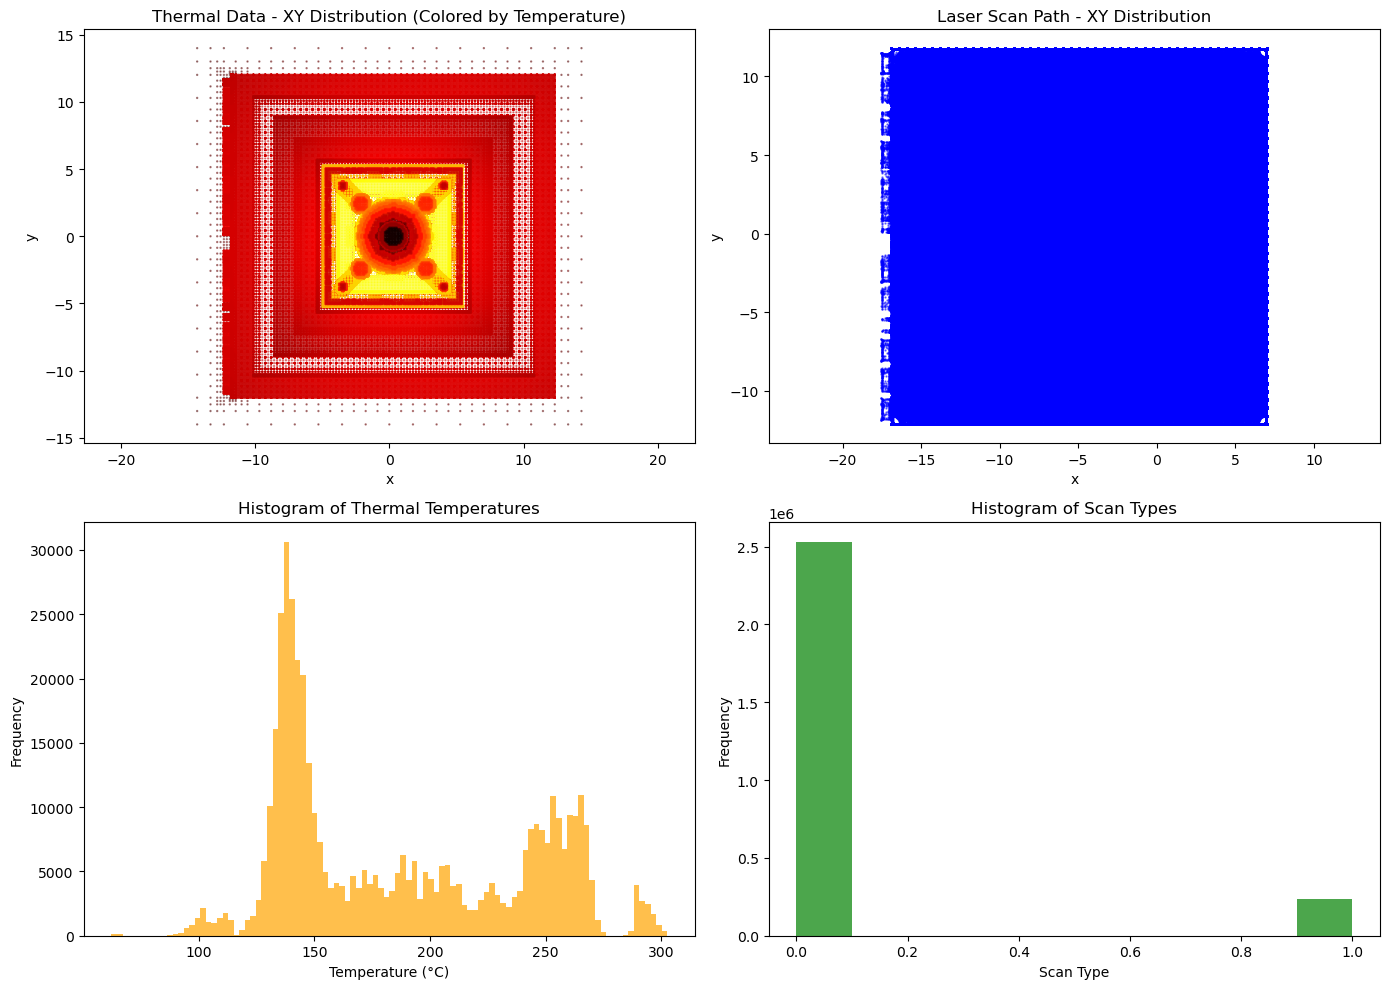

(                   x              y              z              T
 count  464830.000000  464830.000000  464830.000000  464830.000000
 mean       -0.701636       0.028034      22.423150     186.515371
 std         5.723715       5.122178      17.057881      52.469887
 min       -14.310637     -14.010135       0.000000      62.267815
 25%        -3.300171      -3.434325       7.999800     140.072480
 50%        -0.330017      -0.000002      17.193600     170.944470
 75%         3.520183       3.434322      38.446800     242.451870
 max        14.310639      14.010132      59.700000     302.577330,
                   x             y             z     scan_type
 count  2.770538e+06  2.770538e+06  2.770538e+06  2.770538e+06
 mean  -4.924766e+00 -1.760481e-01  1.194380e+01  8.607173e-02
 std    5.978182e+00  5.991175e+00  1.349303e+01  2.804700e-01
 min   -1.752301e+01 -1.214801e+01  0.000000e+00  0.000000e+00
 25%   -8.749465e+00 -4.005654e+00  3.300000e+00  0.000000e+00
 50%   -4.942993e+

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

thermal_df = pd.read_csv("thermal1_scaled.csv")
laser_df = pd.read_csv("laser1.csv")

thermal_summary = thermal_df.describe()
laser_summary = laser_df.describe()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].scatter(thermal_df['x'], thermal_df['y'], s=0.5, alpha=0.5, c=thermal_df['T'], cmap='hot')
axs[0, 0].set_title('Thermal Data - XY Distribution (Colored by Temperature)')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
axs[0, 0].axis('equal')

axs[0, 1].scatter(laser_df['x'], laser_df['y'], s=0.5, alpha=0.5, color='blue')
axs[0, 1].set_title('Laser Scan Path - XY Distribution')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')
axs[0, 1].axis('equal')

axs[1, 0].hist(thermal_df['T'], bins=100, color='orange', alpha=0.7)
axs[1, 0].set_title('Histogram of Thermal Temperatures')
axs[1, 0].set_xlabel('Temperature (°C)')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(laser_df['scan_type'], bins=10, color='green', alpha=0.7)
axs[1, 1].set_title('Histogram of Scan Types')
axs[1, 1].set_xlabel('Scan Type')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

thermal_summary, laser_summary

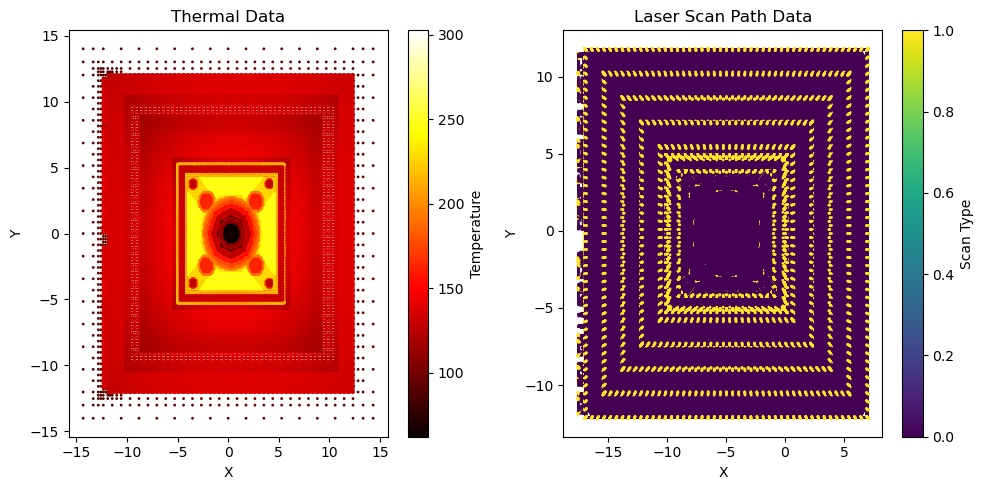

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

thermal_df = pd.read_csv('thermal1_scaled.csv')
laser_df = pd.read_csv('laser1.csv')

thermal_df.head(), laser_df.head()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(thermal_df['x'], thermal_df['y'], c=thermal_df['T'], cmap='hot', s=1)
plt.title('Thermal Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Temperature')

plt.subplot(1, 2, 2)
plt.scatter(laser_df['x'], laser_df['y'], c=laser_df['scan_type'], cmap='viridis', s=1)
plt.title('Laser Scan Path Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Scan Type')

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

thermal_df = pd.read_csv('thermal1_scaled.csv')
laser_df = pd.read_csv('laser1.csv')
registered_df = pd.read_csv('laser1_with_thermal2.csv')

thermal_df.head(), laser_df.head(), registered_df.head()

(           x          y    z         T
 0 -14.310637 -14.010135  0.0  84.75181
 1 -14.310637 -13.015135  0.0  85.45169
 2 -14.310637 -12.020135  0.0  86.43152
 3 -14.310637 -10.302973  0.0  88.11124
 4 -14.310637  -8.585811  0.0  89.65098,
            x          y    z  scan_type
 0 -16.848808 -12.097900  0.0        0.0
 1 -16.848808 -11.579404  0.0        0.0
 2 -16.848808 -11.060908  0.0        0.0
 3 -16.848808 -10.542411  0.0        0.0
 4 -16.848808 -10.023915  0.0        0.0,
            x          y    z  scan_type          T
 0 -16.848808 -12.097900  0.0        0.0  92.309350
 1 -16.848808 -11.579404  0.0        0.0  93.709114
 2 -16.848808 -11.060908  0.0        0.0  94.828930
 3 -16.848808 -10.542411  0.0        0.0  95.388840
 4 -16.848808 -10.023915  0.0        0.0  96.228700)

In [ ]:
Q2

Estimated XY translation vector: [-1.22253735 -0.01001848]


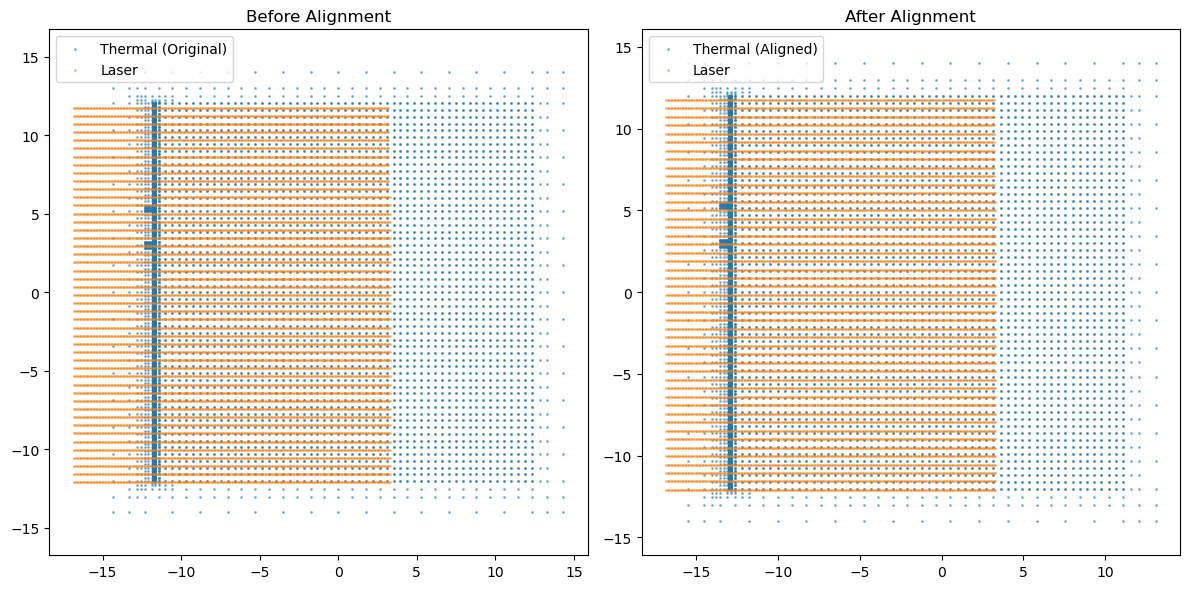

In [3]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt

thermal_df = pd.read_csv("thermal1_scaled.csv", nrows=10000)
laser_df = pd.read_csv("laser1.csv", nrows=10000)


laser_tree = cKDTree(laser_df[['x', 'y']].values)


thermal_xy = thermal_df[['x', 'y']].values
distances, indices = laser_tree.query(thermal_xy, k=1)


nearest_laser_points = laser_df.iloc[indices][['x', 'y']].values
offsets = nearest_laser_points - thermal_xy
mean_translation = np.mean(offsets, axis=0)
print(f"Estimated XY translation vector: {mean_translation}")


thermal_df_aligned = thermal_df.copy()
thermal_df_aligned['x'] += mean_translation[0]
thermal_df_aligned['y'] += mean_translation[1]


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(thermal_df['x'], thermal_df['y'], s=1, label='Thermal (Original)', alpha=0.5)
plt.scatter(laser_df['x'], laser_df['y'], s=1, label='Laser', alpha=0.5)
plt.title("Before Alignment")
plt.legend()
plt.axis('equal')


plt.subplot(1, 2, 2)
plt.scatter(thermal_df_aligned['x'], thermal_df_aligned['y'], s=1, label='Thermal (Aligned)', alpha=0.5)
plt.scatter(laser_df['x'], laser_df['y'], s=1, label='Laser', alpha=0.5)
plt.title("After Alignment")
plt.legend()
plt.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
Q3

In [4]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

thermal_df = pd.read_csv("thermal1_scaled.csv")
laser_df = pd.read_csv("laser1.csv")  


thermal_coords = thermal_df[['x', 'y', 'z']].values
thermal_tree = cKDTree(thermal_coords)


laser_coords = laser_df[['x', 'y', 'z']].values
_, nearest_indices = thermal_tree.query(laser_coords, k=1)


laser_df['T_mapped'] = thermal_df.iloc[nearest_indices]['T'].values


print(laser_df[['x', 'y', 'z', 'scan_type', 'T_mapped']].head())


           x          y    z  scan_type  T_mapped
0 -16.848808 -12.097900  0.0        0.0  86.43152
1 -16.848808 -11.579404  0.0        0.0  86.43152
2 -16.848808 -11.060908  0.0        0.0  88.11124
3 -16.848808 -10.542411  0.0        0.0  88.11124
4 -16.848808 -10.023915  0.0        0.0  88.11124


In [ ]:
Q4

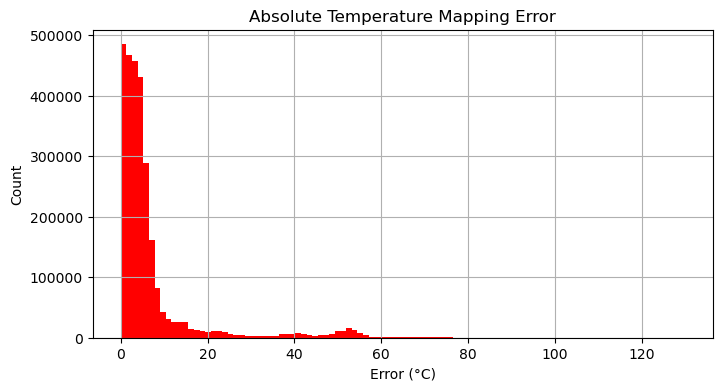

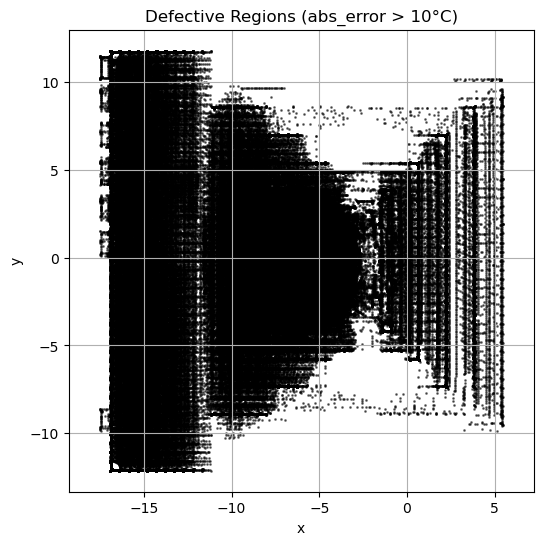

Mean Absolute Error: 6.94 °C
Max Error: 129.81 °C
Defective Points: 362911


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

thermal_df = pd.read_csv("thermal1_scaled.csv")
laser_df = pd.read_csv("laser1.csv")
reference_df = pd.read_csv("laser1_with_thermal2.csv")

from scipy.spatial import cKDTree
thermal_tree = cKDTree(thermal_df[['x', 'y', 'z']].values)
_, nearest_indices = thermal_tree.query(laser_df[['x', 'y', 'z']].values, k=1)
laser_df['T_mapped'] = thermal_df.iloc[nearest_indices]['T'].values

laser_df['T_reference'] = reference_df['T']

laser_df['abs_error'] = np.abs(laser_df['T_reference'] - laser_df['T_mapped'])

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.hist(laser_df['abs_error'], bins=100, color='red')
plt.title("Absolute Temperature Mapping Error")
plt.xlabel("Error (°C)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

threshold = 10.0
defects = laser_df[laser_df['abs_error'] > threshold]

plt.figure(figsize=(6, 6))
plt.scatter(defects['x'], defects['y'], s=1, color='black', alpha=0.5)
plt.title("Defective Regions (abs_error > 10°C)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid(True)
plt.show()

print(f"Mean Absolute Error: {laser_df['abs_error'].mean():.2f} °C")
print(f"Max Error: {laser_df['abs_error'].max():.2f} °C")
print(f"Defective Points: {len(defects)}")

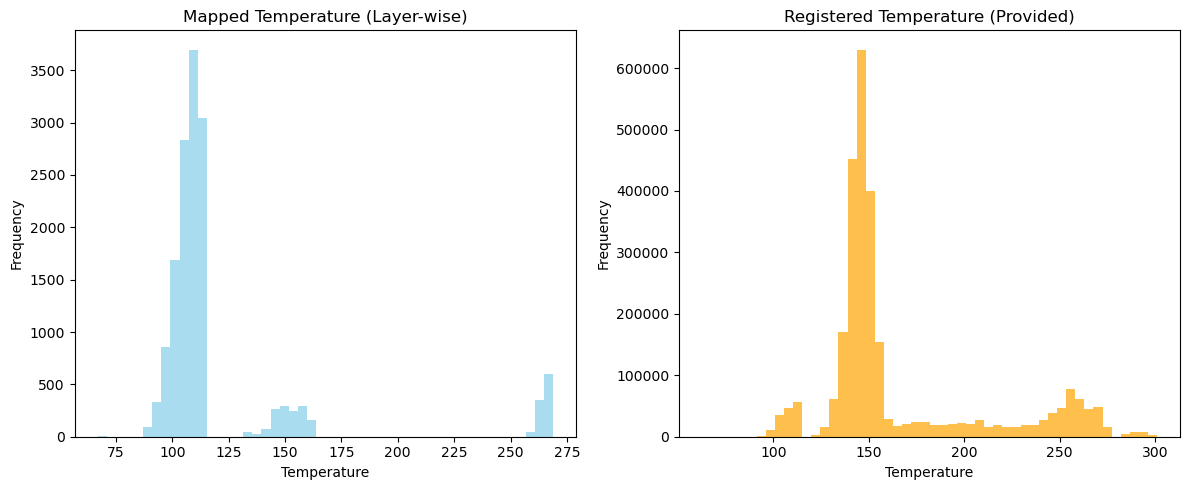

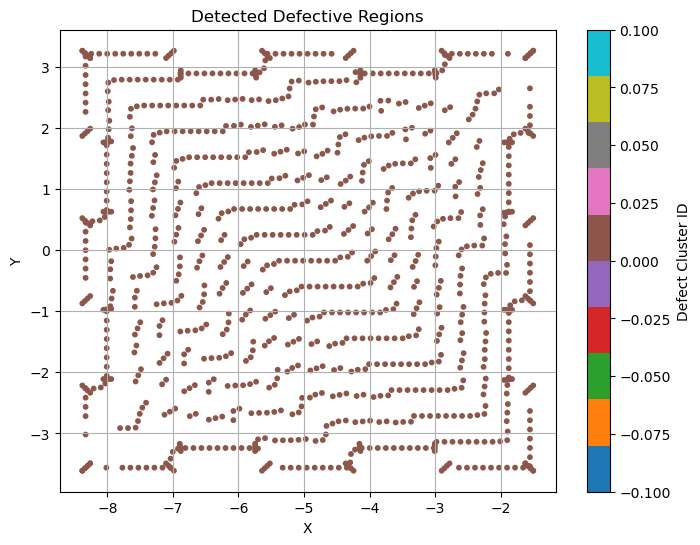

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

thermal_df = pd.read_csv('thermal1_scaled.csv')
laser_df = pd.read_csv('laser1.csv')
registered_df = pd.read_csv('laser1_with_thermal2.csv')


def align_coordinates(thermal, laser):
    thermal_center = thermal[['x', 'y']].mean()
    laser_center = laser[['x', 'y']].mean()
    shift = laser_center - thermal_center
    thermal[['x', 'y']] += shift
    return thermal

thermal_aligned = align_coordinates(thermal_df.copy(), laser_df)



def map_temperature_layerwise(thermal, laser):
    mapped_data = []
    for z in laser['z'].unique():
        laser_layer = laser[laser['z'] == z]
        thermal_layer = thermal[thermal['z'] == z]

        if thermal_layer.empty or laser_layer.empty:
            continue

        tree = cKDTree(thermal_layer[['x', 'y']].values)
        dist, idx = tree.query(laser_layer[['x', 'y']].values, k=1)
        laser_layer = laser_layer.copy()
        laser_layer['T'] = thermal_layer.iloc[idx]['T'].values
        mapped_data.append(laser_layer)

    return pd.concat(mapped_data, ignore_index=True)

laser_mapped = map_temperature_layerwise(thermal_aligned, laser_df)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(laser_mapped['T'].dropna(), bins=50, alpha=0.7, color='skyblue')
plt.title("Mapped Temperature (Layer-wise)")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(registered_df['T'].dropna(), bins=50, alpha=0.7, color='orange')
plt.title("Registered Temperature (Provided)")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


defect_df = laser_mapped.dropna(subset=['T'])

threshold = defect_df['T'].mean() + 2 * defect_df['T'].std()
anomalies = defect_df[defect_df['T'] > threshold].copy()


scaler = StandardScaler()
coords = scaler.fit_transform(anomalies[['x', 'y']])
db = DBSCAN(eps=0.5, min_samples=10).fit(coords)
anomalies['defect_cluster'] = db.labels_


plt.figure(figsize=(8, 6))
scatter = plt.scatter(anomalies['x'], anomalies['y'], c=anomalies['defect_cluster'], cmap='tab10', s=10)
plt.colorbar(scatter, label='Defect Cluster ID')
plt.title("Detected Defective Regions")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


anomalies.to_csv("defective_regions.csv", index=False)
laser_mapped.to_csv("laser_with_mapped_temp.csv", index=False)